In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV

<center><H1>KMeans Clustering</H1></center>

<p align="center">
  <img width="400" height="350" src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif">
</p>


### Steps

**All the libraries you need have been imported for you**

**Work through at least 2 of preloaded datasets and:**
- [Standardize your Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- Create Elbow Plot to Determine Clusters
- Apply [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- Plot Results of Actual Results Compared to KMeans Cluster Labels
- Determine Accuracy Score if true labels are known

### 🧞‍♂️BONUS🧞‍♀️
- Complete all 3 preloaded datasets

## **Dog Horse KMeans Challenge**

### **Load data**

In [ ]:
# Import Data
df_dh = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv")
df_dh.sample(3)

,height,weight,target,type
78,34.0,80.0,0.0,dog
46,31.0,40.0,0.0,dog
180,47.0,153.0,1.0,horse


### **EDA**

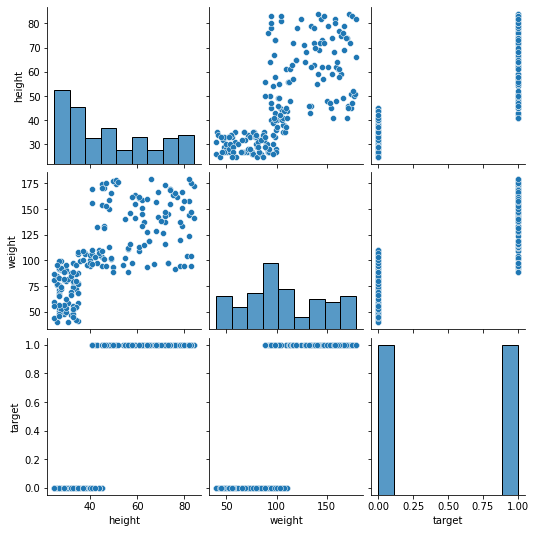

In [ ]:
sns.pairplot(df_dh);

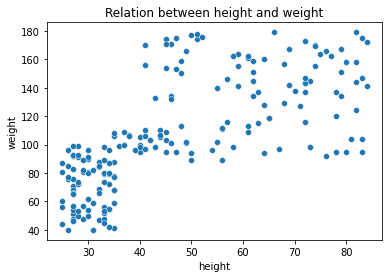

In [ ]:
sns.scatterplot(data = df_dh, x= 'height', y ='weight')
plt.title("Relation between height and weight");

### **Data Prepration**

In [ ]:
# Split data
X = df_dh[['height','weight']]


### **Elbow Plot**

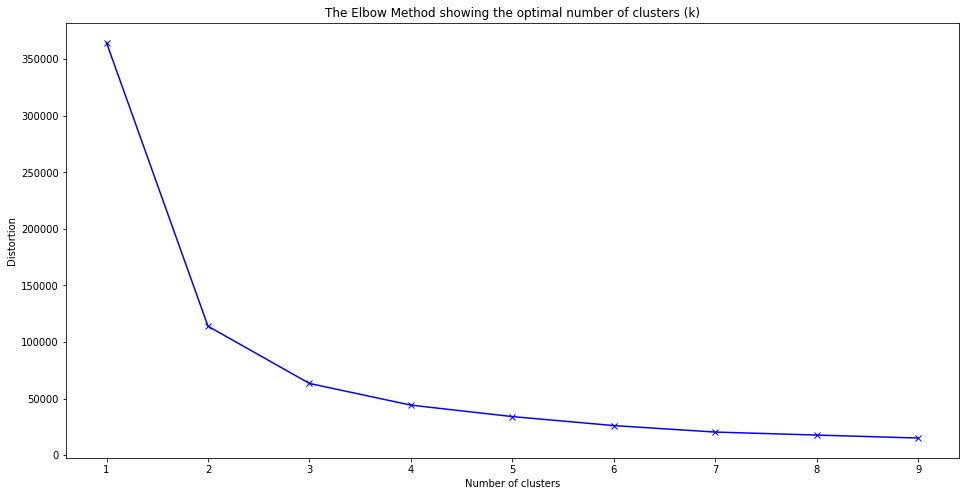

In [ ]:
# Create Elbow Plot

w = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    w.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, w, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters (k)')
plt.show()

### **Create pipeline and train model** 

In [ ]:
# create a pipeline to scale data and 
# Apply KMeans 
pip_dh = make_pipeline(StandardScaler(),  
                  KMeans(n_clusters=2))

pip_dh.fit(X)
y_pred_dh = pip_dh.predict(X)
df_dh['pred_cluster'] = y_pred_dh

### **Compare the results**

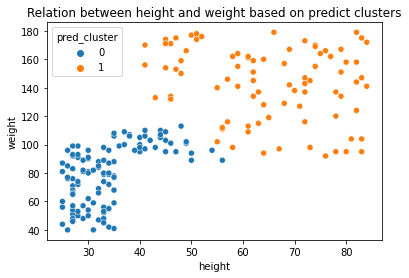

In [ ]:
# Plot KMeans Results and Actual Results
sns.scatterplot(data = df_dh, x= 'height', y ='weight', hue='pred_cluster')
plt.title("Relation between height and weight based on predict clusters");

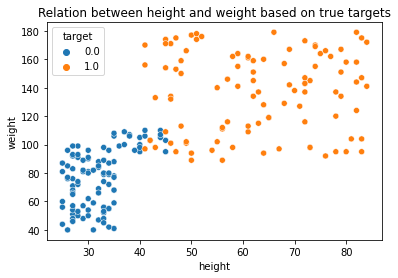

In [ ]:
sns.scatterplot(data = df_dh, x= 'height', y ='weight', hue='target')
plt.title("Relation between height and weight based on true targets");

In [ ]:
# Compute Accuracy Score of KMean Labels with True Labels
print("Accuracy for kmean model with2 clusters: ",accuracy_score(df_dh['target'],y_pred_dh))

Accuracy for kmean model with2 clusters:  0.935


## **Seattle Weather KMeans Challenge**

### **Load data**

In [ ]:
df_sea = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv")
df_sea.sample(3)

,ds,prcp,tmax,tmin,rain
18020,1997-05-03,0.3,55,47,True
21859,2007-11-06,0.0,52,40,False
13701,1985-07-06,0.0,73,55,False


### **Data Prepration**

In [ ]:
# Split Data
X_sea = df_sea[['tmax','tmin']]
df_sea['rain'] = df_sea['rain'].astype(bool)

### **Elbow Plot**

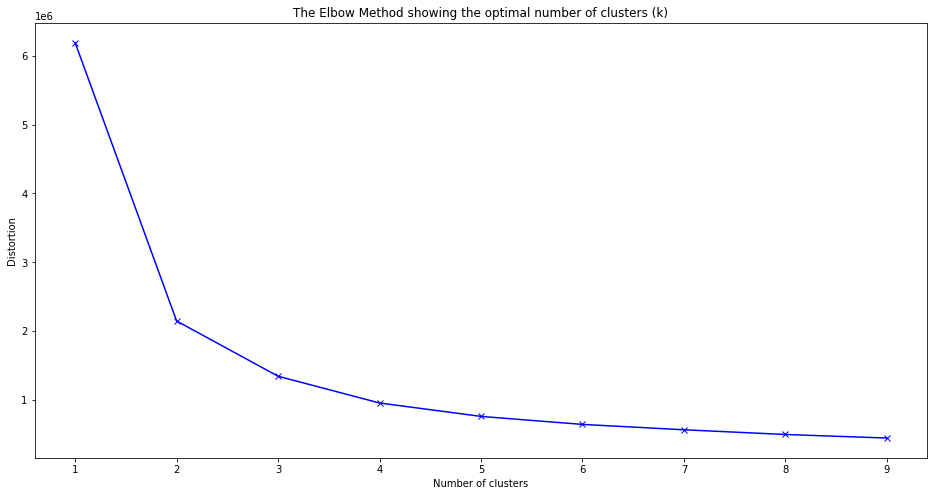

In [ ]:
# Create Elbow Plot

w_sea = []
K = range(1,10)
for k in K:
    kmeanModel_sea = KMeans(n_clusters=k)
    kmeanModel_sea.fit(X_sea)
    w_sea.append(kmeanModel_sea.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, w_sea, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters (k)')
plt.show()

### **Create pipeline and train model**

In [ ]:
# create a pipeline to scale data and 
# Apply KMeans 
pip_sea = make_pipeline(StandardScaler(),  
                  KMeans(n_clusters=2))

pip_sea.fit(X_sea)
y_pred_sea = pip_dh.predict(X_sea)
df_sea['pred_cluster'] = y_pred_sea

### **Compare the results**

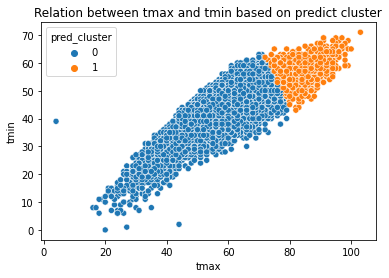

In [ ]:
sns.scatterplot(data = df_sea, x= 'tmax', y ='tmin', hue='pred_cluster')
plt.title("Relation between tmax and tmin based on predict cluster");

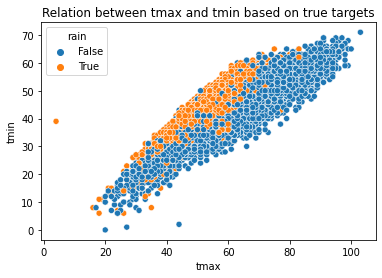

In [ ]:
sns.scatterplot(data = df_sea, x= 'tmax', y ='tmin', hue='rain')
plt.title("Relation between tmax and tmin based on true targets");

In [ ]:
# Compute Accuracy Score of KMean Labels with True Labels
print("Accuracy for kmean model with2 clusters: ",accuracy_score(df_sea['rain'],y_pred_sea))

Accuracy for kmean model with2 clusters:  0.4585339125670228


## **Random Blob KMeans Challenge**

- You dont have true labels for this data so this is truly an unsupervised dataset
- The blobs are randomly generated every time you run the cell and their characteristics are:
    - 2000-4000 data points
    - 10-30 blobs created

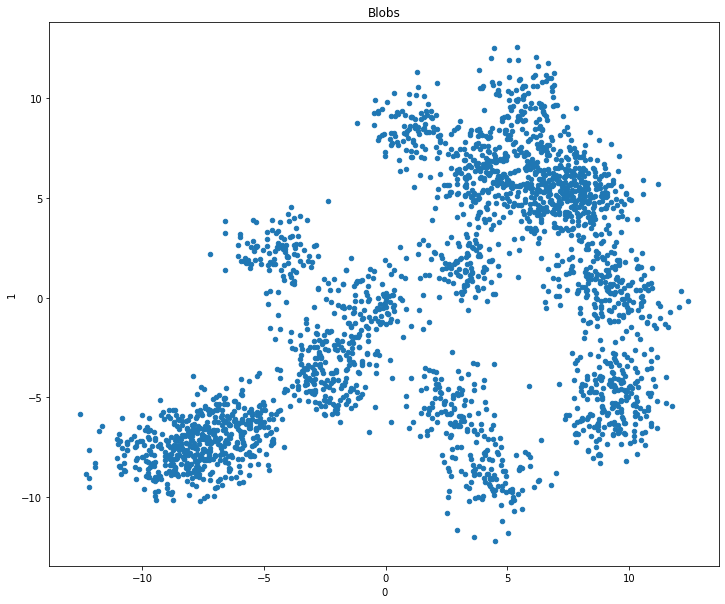

In [ ]:
df_blob = pd.DataFrame(make_blobs(random.randint(2000,4000), centers=random.randint(10,30))[0])
df_blob.plot(kind="scatter", x=0, y=1, title="Blobs", figsize=(12,10));

### **Elbow Plot**

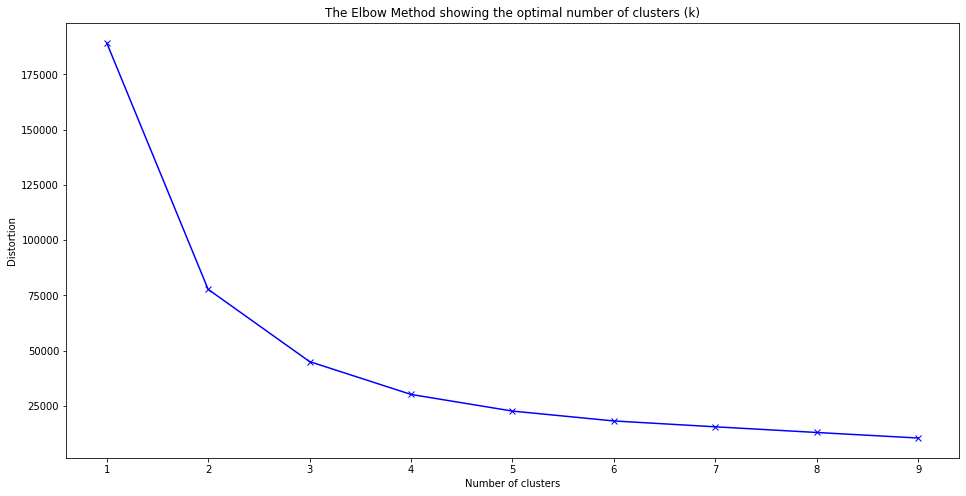

In [ ]:

# Create Elbow Plot

w_3 = []
K = range(1,10)
for k in K:
    kmeanModel_3 = KMeans(n_clusters=k)
    kmeanModel_3.fit(df_blob)
    w_3.append(kmeanModel_3.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, w_3, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters (k)')
plt.show()

### **Create pipeline and train data**

In [ ]:
# create a pipeline to scale data and 
# Apply KMeans 
pip_3 = Pipeline(steps=[('standardscaler',StandardScaler()),  
                  ('kmeans',KMeans(n_clusters=6))])

pip_3.fit(df_blob)
y_pred_3 = pip_3.predict(df_blob)
df_blob['pred_cluster'] = y_pred_3


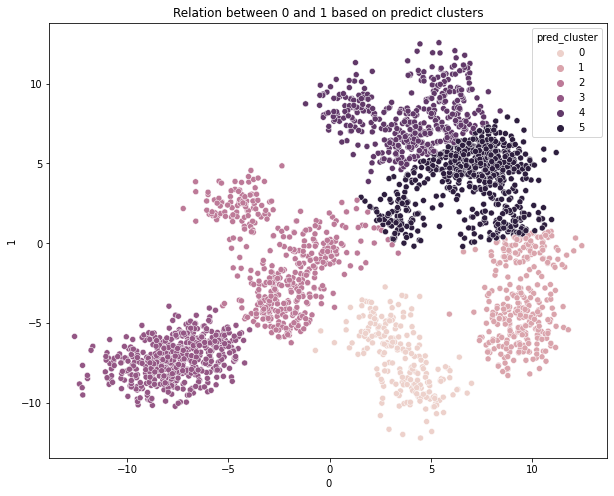

In [ ]:
# Plot KMeans Results
plt.figure(figsize=(10,8))
sns.scatterplot(data = df_blob, x= 0, y =1 , hue='pred_cluster')
plt.title("Relation between 0 and 1 based on predict clusters");

### **Create kmean model using GridSearchCV**

In [ ]:
param_grid = {
    "kmeans__n_clusters": [4,5,6,7,8], 
    "kmeans__init": ["k-means++", "random"], 
    "kmeans__n_init": [10,20,30] 
    
}

grid = GridSearchCV(
    pip_3, # model
    param_grid, # hyperparameter to tune
    cv = 5, # K-fold cross validation
    n_jobs=-1, # use all cores on cpu
    verbose=1 # show output
)

grid.fit(df_blob)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   12.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=6, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
        

#### **Best model results**

In [ ]:
grid.best_params_

{'kmeans__init': 'random', 'kmeans__n_clusters': 8, 'kmeans__n_init': 30}

In [ ]:
df_blob['pred_cluster_grid'] = grid.best_estimator_.predict(df_blob)

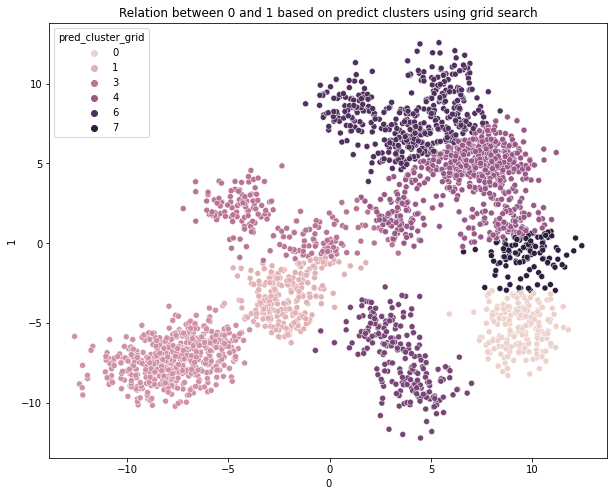

In [ ]:
# Plot KMeans Results
plt.figure(figsize=(10,8))
sns.scatterplot(data = df_blob, x= 0, y =1 , hue='pred_cluster_grid')
plt.title("Relation between 0 and 1 based on predict clusters using grid search");